In [1]:
# notebooks/Model_Tuning_NN.ipynb

# Instalación de dependencias necesarias
!pip install pandas numpy scikit-learn tensorflow


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\ealda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import matplotlib.pyplot as plt
import os


In [3]:
# Crear directorios para guardar modelos si no existen
os.makedirs('../models', exist_ok=True)
os.makedirs('../reports', exist_ok=True)

In [4]:
# Cargar los datos
train_data = pd.read_csv('../data/train.csv')

In [5]:
# Preprocesamiento de datos: Imputación de valores nulos en columnas numéricas
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
train_data_imputed = train_data.copy()
train_data_imputed[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())

In [6]:
# Selección de características y variable objetivo
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
target = 'SalePrice'

In [7]:

X = train_data_imputed[features]
y = train_data_imputed[target]


In [8]:
# Estandarización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Definición del modelo de red neuronal con regularización
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

C:\Users\ealda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compilación del modelo
model.compile(optimizer='adam', loss='mse')

In [12]:
# Callback para detener el entrenamiento si no hay mejora
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 38216462336.0000 - val_loss: 39650734080.0000
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40189227008.0000 - val_loss: 39618768896.0000
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41740451840.0000 - val_loss: 39453794304.0000
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38843592704.0000 - val_loss: 38909698048.0000
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38113247232.0000 - val_loss: 37586571264.0000
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35677945856.0000 - val_loss: 34981462016.0000
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35227295744.0000 - val_loss: 30680346624.0000
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28501331968.0000 - val_loss: 24748922880.0000
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22533668864.0000 - val_loss: 17944903680.0000
Epoch 10/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

In [14]:
# Guardar el modelo entrenado con regularización
model.save('../models/nn_model_tuned.h5')

In [15]:
# Predicciones y evaluación
y_pred = model.predict(X_test).flatten()
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE después de ajuste: {rmse_tuned}')

# Guardar los resultados en un archivo
with open('../reports/tuning_report_nn.txt', 'w') as f:
    f.write(f'RMSE después de ajuste: {rmse_tuned}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RMSE después de ajuste: 37077.94495137035


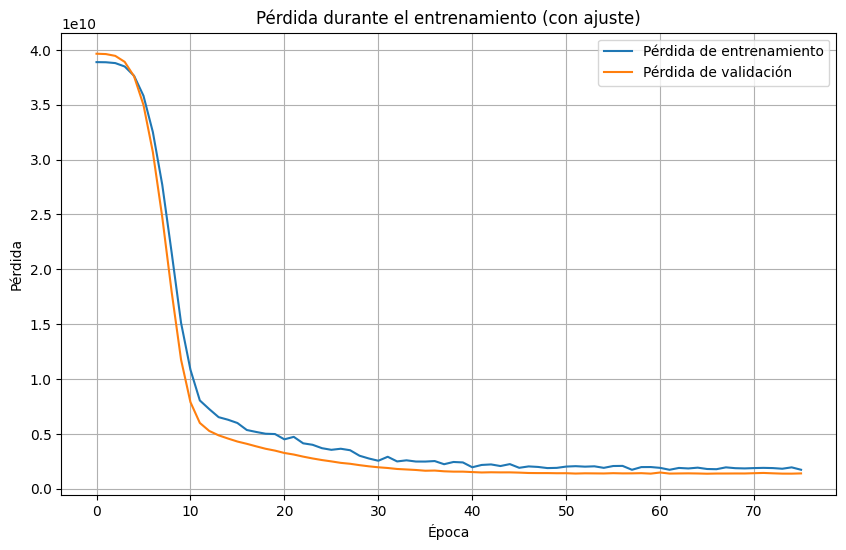

In [17]:
# Gráfica de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento (con ajuste)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.savefig('../reports/loss_curve_tuned.png')
plt.show()

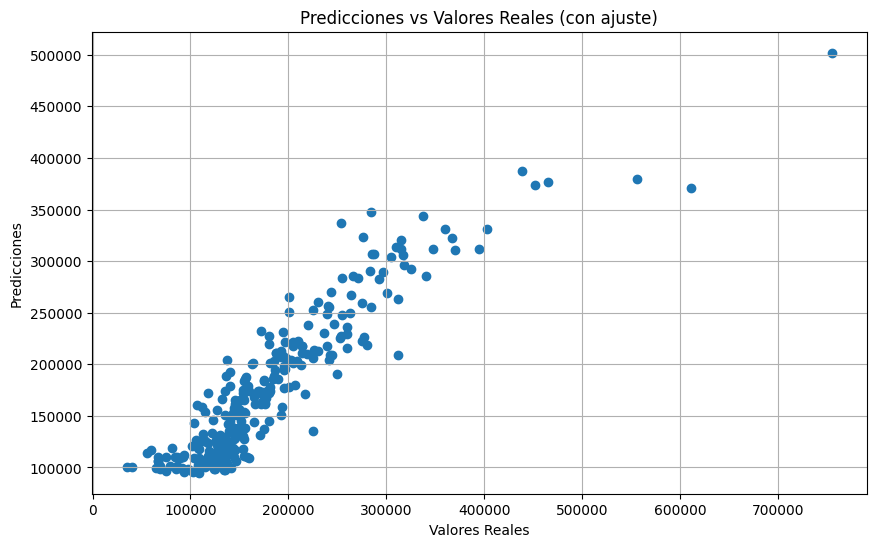

In [18]:
# Gráfica de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (con ajuste)')
plt.grid(True)
plt.savefig('../reports/pred_vs_real_tuned.png')
plt.show()